NAIVE BAYES

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import re
from scipy.sparse import vstack, hstack
from sklearn.naive_bayes import MultinomialNB



In [ ]:
df = pd.read_csv("data/preprocessed_reviews.csv")
df

,Comment,Sentiment,comment_english,copy_comment,STREM+FPS3,STREM+FPS5,STREM+FPS7,STREM+ZEM
0,evet anlatıldığı gibi,1,evet anlatildigi,evet anlatıldığı,eve anl,evet anlat,evet anlatil,evet anla
1,Daha öncede almıştım bu cihazdan ense ve sakal...,1,oncede almistim cihazdan ense sakal tuketmek i...,öncede almıştım cihazdan ense sakal tüketmek n...,onc alm cih ens sak tuk ici num sif yak ali,onced almis cihaz ense sakal tuket icin numar ...,oncede almisti cihazda ense sakal tuketme icin...,önce al cihaz ense sakal tüket numara sıfır ya...
2,Ürün gayet başarılı sakal kesmede başlık sayıs...,1,urun basarili sakal kesmede baslik sayisi fazl...,ürün başarılı sakal kesmede başlık sayısı fazl...,uru bas sak kes bas say faz ola 0 yak ali kir ...,urun basar sakal kesme basli sayis fazla olabi...,urun basaril sakal kesmede baslik sayisi fazla...,ürün başarı sakal kes başlık sayı fazla olabil...
3,Daha öncede aynısını almıştım çok güzel ve kal...,1,oncede aynisini almistim cok guzel kaliteli ur...,öncede aynısını almıştım güzel kaliteli ürün .,onc ayn alm cok guz kal uru,onced aynis almis cok guzel kalit urun,oncede aynisin almisti cok guzel kalitel urun,önce aynı al güzel kalite ürün
4,Erkek kuaförüyüm ense ve sıfır sakal traşı içi...,1,erkek kuaforuyum ense sifir sakal trasi icin u...,erkek kuaförüyüm ense sıfır sakal traşı uygun ...,erk kua ens sif sak tra ici uyg uru,erkek kuafo ense sifir sakal trasi icin uygun ...,erkek kuaforu ense sifir sakal trasi icin uygu...,erkek kuaför ense sıfır sakal traş uygun ürün
...,...,...,...,...,...,...,...,...
15165,ışık seviyesi rezalet,0,isik seviyesi rezalet,ışık seviyesi rezalet,isi sev rez,isik seviy rezal,isik seviyes rezalet,ışık seviye rezalet
15166,Hic begenmedim. Aydinlatma hic yok ve her kapa...,0,hic begenmedim . aydinlatma hic kapattigimda a...,hic begenmedim . aydinlatma hic kapattigimda a...,hic beg ayd hic kap aya sif,hic begen aydin hic kapat ayari sifir,hic begenme aydinla hic kapatti ayari sifirla,hic begenmedim aydinlatma hic kapattigimda aya...
15167,2 gün sonra hoparlörü bozuldu kullanışsız,0,2 gun hoparloru bozuldu kullanissiz,2 gün hoparlörü bozuldu kullanışsız,2 gun hop boz kul,2 gun hopar bozul kulla,2 gun hoparlo bozuldu kullani,2 gün hoparlör boz kullan
15168,aşırı boğuk bir sesi ve rengi var kumanda heme...,0,asiri boguk sesi rengi kumanda hemen bozuldu .,aşırı boğuk sesi rengi kumanda hemen bozuldu .,asi bog ses ren kum hem boz,asiri boguk sesi rengi kuman hemen bozul,asiri boguk sesi rengi kumanda hemen bozuldu,aşırı boğuk ses renk kumanda hemen boz


# Naive Bayes with our Preprocessing

In [23]:
df = df.loc[df["Sentiment"] != 2]

In [24]:
# We are doing TF-IDF Vectorization with unigrams and bigrams to convert text data into numerical format
tfidf = TfidfVectorizer(
    ngram_range=(1, 2),
    max_features=20000,
    min_df=3,
    max_df=0.9
)

X = tfidf.fit_transform(df["comment_english"])
y = df["Sentiment"]

In [25]:
# Splitting the dataset into training, testing and validation sets (60% train, 20% validation, 20% test)
X_temp, X_test, y_temp, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp,
    y_temp,
    test_size=0.25,
    random_state=42,
    stratify=y_temp
)
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 95869 stored elements and shape (8255, 9814)>

In [26]:
nb_model = MultinomialNB(alpha=1.0)

In [27]:
nb_model.fit(X_train, y_train)

MultinomialNB()

In [28]:
y_val_pred_nb = nb_model.predict(X_val)

print("Naive Bayes Validation results")
print(classification_report(y_val, y_val_pred_nb))
print("Accuracy:", accuracy_score(y_val, y_val_pred_nb))
print("Confusion matrix:")
print(confusion_matrix(y_val, y_val_pred_nb))

Naive Bayes Validation results
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1395
           1       0.95      0.96      0.95      1357

    accuracy                           0.95      2752
   macro avg       0.95      0.95      0.95      2752
weighted avg       0.95      0.95      0.95      2752

Accuracy: 0.9542151162790697
Confusion matrix:
[[1320   75]
 [  51 1306]]


In [29]:
y_test_pred_nb = nb_model.predict(X_test)

print("Naive Bayes test results")
print(classification_report(y_test, y_test_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_test_pred_nb))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_test_pred_nb))

Naive Bayes test results
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1395
           1       0.96      0.96      0.96      1357

    accuracy                           0.96      2752
   macro avg       0.96      0.96      0.96      2752
weighted avg       0.96      0.96      0.96      2752

Accuracy: 0.9603924418604651
Confusion matrix:
[[1334   61]
 [  48 1309]]


# ERROR ANALYSIS

In [35]:
test_indices = y_test.index
df_test_data = pd.DataFrame({
    'comment_english': df.loc[test_indices, 'comment_english'],
    'Sentiment': y_test
})
df_test_data

,comment_english,Sentiment
12233,"ayaklari ceviz degil , basligi kumas degil . p...",0
8856,bence cok basarili renkli ekran cocuklari tabl...,1
13946,aman ha aman almayin kardesim ozensiz posetle ...,0
3404,sifira yakin kesiyor babama aldim cok begendi,1
3096,piyasadaki adi belli markalara tas cikartir . ...,1
...,...,...
7171,urunu cok begendm marioyu ozlemisim,1
4282,kolu cat kirildi cok kalitesiz cikti tavsiye e...,0
3544,parasina gore iyiydi kargo ekibini tebrik ediy...,1
48,hasarli gelgi geri yolladim kullanmadik,0


In [36]:
df_test_data = df_test_data.reset_index(drop=True)
df_test_data

,comment_english,Sentiment
0,"ayaklari ceviz degil , basligi kumas degil . p...",0
1,bence cok basarili renkli ekran cocuklari tabl...,1
2,aman ha aman almayin kardesim ozensiz posetle ...,0
3,sifira yakin kesiyor babama aldim cok begendi,1
4,piyasadaki adi belli markalara tas cikartir . ...,1
...,...,...
2747,urunu cok begendm marioyu ozlemisim,1
2748,kolu cat kirildi cok kalitesiz cikti tavsiye e...,0
2749,parasina gore iyiydi kargo ekibini tebrik ediy...,1
2750,hasarli gelgi geri yolladim kullanmadik,0


In [37]:
df_test_data['Sentiment_Predicted'] = y_test_pred_nb
fp = (df_test_data['comment_english'] == 0) & (df_test_data['Sentiment_Predicted'] == 1)
df_false_positives = df_test_data[fp]
df_false_positives

,comment_english,Sentiment,Sentiment_Predicted


In [33]:
fn = (df_test_data['Sentiment'] == 1) & (df_test_data['Sentiment_Predicted'] == 0)
df_false_negatives = df_test_data[fn]
df_false_negatives

,STREM+ZEM,Sentiment,Sentiment_Predicted
14,kalite yan fatura gerek arızalan bişey fatura,1,0
24,demonte şekil gel ürün,1,0
44,telefon uzak aşırı bi,1,0
167,kullanislii,1,0
186,guzel hic sorun,1,0
245,yap rahat kullan,1,0
300,fotografta gorundugu,1,0
301,be,1,0
306,görün,1,0
364,sakal ince al,1,0


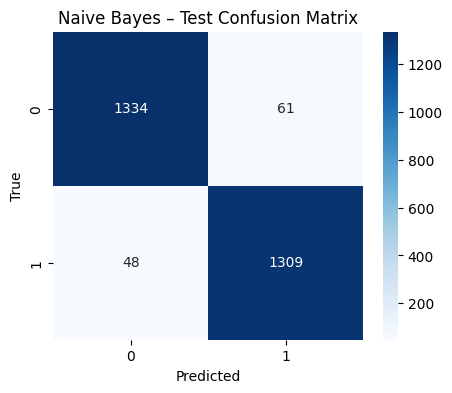

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_test_pred_nb), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Naive Bayes – Test Confusion Matrix")
plt.show()

# Naive Bayes with Zemberek algorithm

In [6]:
df = df.dropna(subset=['STREM+ZEM'])

In [7]:
df["STREM+ZEM"].isna().sum()

np.int64(0)

In [8]:
df = df.loc[df["Sentiment"] != 2]

In [9]:
# We are doing TF-IDF Vectorization with unigrams and bigrams to convert text data into numerical format
tfidf = TfidfVectorizer(
    ngram_range=(1, 2),
    max_features=20000,
    min_df=3,
    max_df=0.9
)

X = tfidf.fit_transform(df["STREM+ZEM"])
y = df["Sentiment"]

In [10]:
# Splitting the dataset into training, testing and validation sets (60% train, 20% validation, 20% test)
X_temp, X_test, y_temp, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp,
    y_temp,
    test_size=0.25,
    random_state=42,
    stratify=y_temp
)
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 92709 stored elements and shape (8255, 8433)>

In [11]:
nb_model = MultinomialNB(alpha=1.0)

In [12]:
nb_model.fit(X_train, y_train)

MultinomialNB()

In [13]:
y_val_pred_nb = nb_model.predict(X_val)

print("Naive Bayes Validation results")
print(classification_report(y_val, y_val_pred_nb))
print("Accuracy:", accuracy_score(y_val, y_val_pred_nb))
print("Confusion matrix:")
print(confusion_matrix(y_val, y_val_pred_nb))

Naive Bayes Validation results
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1395
           1       0.92      0.92      0.92      1357

    accuracy                           0.92      2752
   macro avg       0.92      0.92      0.92      2752
weighted avg       0.92      0.92      0.92      2752

Accuracy: 0.921875
Confusion matrix:
[[1293  102]
 [ 113 1244]]


In [14]:
y_test_pred_nb = nb_model.predict(X_test)

print("Naive Bayes test results")
print(classification_report(y_test, y_test_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_test_pred_nb))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_test_pred_nb))

Naive Bayes test results
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1395
           1       0.93      0.93      0.93      1357

    accuracy                           0.93      2752
   macro avg       0.93      0.93      0.93      2752
weighted avg       0.93      0.93      0.93      2752

Accuracy: 0.9335029069767442
Confusion matrix:
[[1304   91]
 [  92 1265]]


<h1>ERROR ANALYSIS

In [15]:
test_indices = y_test.index
df_test_data = pd.DataFrame({
    'STREM+ZEM': df.loc[test_indices, 'STREM+ZEM'],
    'Sentiment': y_test
})
df_test_data

,STREM+ZEM,Sentiment
12233,ayak ceviz başlık kumaş plastik dandik ayak dü...,0
8856,ben başarı renk ekran çocuk tablet telefon uza...,1
13946,aman ha aman almayin kardesim ozensiz posetle ...,0
3404,sıfır yakın kes baba al beğendi,1
3096,piyasa ad belli marka taş çıkart sıfır kes ola...,1
...,...,...
7171,ürün begendm mario özle,1
4282,kol çat kır kalite çık tavsiye et,0
3544,para iyi kargo ekip tebrik et,1
48,hasar gelgi geri yolla kullan,0


In [16]:
df_test_data = df_test_data.reset_index(drop=True)
df_test_data

,STREM+ZEM,Sentiment
0,ayak ceviz başlık kumaş plastik dandik ayak dü...,0
1,ben başarı renk ekran çocuk tablet telefon uza...,1
2,aman ha aman almayin kardesim ozensiz posetle ...,0
3,sıfır yakın kes baba al beğendi,1
4,piyasa ad belli marka taş çıkart sıfır kes ola...,1
...,...,...
2747,ürün begendm mario özle,1
2748,kol çat kır kalite çık tavsiye et,0
2749,para iyi kargo ekip tebrik et,1
2750,hasar gelgi geri yolla kullan,0


In [18]:
df_test_data['Sentiment_Predicted'] = y_test_pred_nb
fp = (df_test_data['STREM+ZEM'] == 0) & (df_test_data['Sentiment_Predicted'] == 1)
df_false_positives = df_test_data[fp]
df_false_positives

,STREM+ZEM,Sentiment,Durum_Predicted,Sentiment_Predicted


In [19]:
fn = (df_test_data['Sentiment'] == 1) & (df_test_data['Sentiment_Predicted'] == 0)
df_false_negatives = df_test_data[fn]
df_false_negatives

,STREM+ZEM,Sentiment,Durum_Predicted,Sentiment_Predicted
7,ürün geç gel sıkıntı yok kullan kalite,1,0,0
11,ucuz kalite,1,0,0
14,kalite yan fatura gerek arızalan bişey fatura,1,0,0
24,demonte şekil gel ürün,1,0,0
44,telefon uzak aşırı bi,1,0,0
...,...,...,...,...
2581,fiyat renk mor ko pembe güzel,1,0,0
2591,memnun um boz,1,0,0
2674,kalite yerli mal,1,0,0
2733,kesinlikle numaraa,1,0,0


-----------


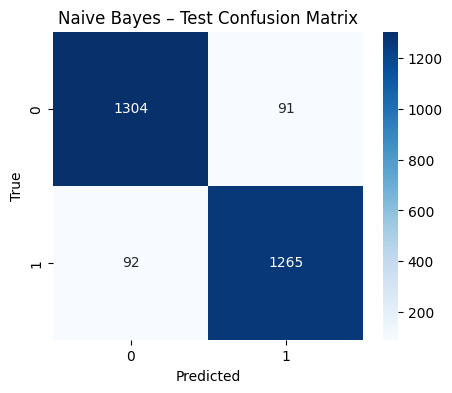

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_test_pred_nb), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Naive Bayes – Test Confusion Matrix")
plt.show()